# Numerical experiments:

### Preparations

In [40]:
import numpy as np
import scipy as sp
from scipy import sparse
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy.sparse import diags, csr_matrix
import time
#import psutil
import setup
import cg
import pr_cg

### Poisson 1D

float64
0.0024531219999985865 41
residual norm: 1.1383053419903234e-16
float64
0.0027951819999998406 41
residual norm: 1.890544138636369e-16
0.0028818430000008277 40
residual norm: 1.892858603125229e-16
(64, 64) (41, 64)


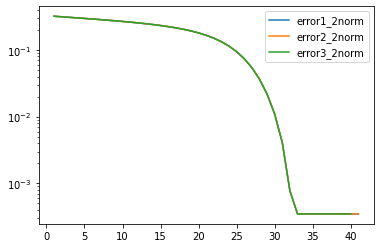

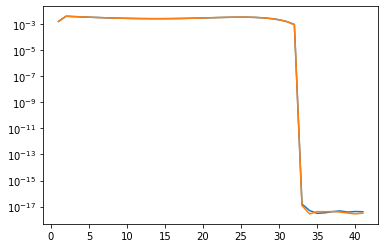

In [41]:
n = 64
A, b, x_exact, x0 = setup.setup_1d_poisson(n)
dtype = np.float64
A = A.astype(dtype)
b = b.astype(dtype)
x0 = x0.astype(dtype)

# preconditioners
jacobi = lambda x: (1/A.diagonal())*x
jacobi = lambda x: x

start = time.process_time()
x1, iterates1, residuals1 = cg.pcg(A, b, x0, x_exact, preconditioner=jacobi, max_iter=40, eps=0, variant='mpr_cg')
print(x1.dtype)
print(time.process_time() - start, len(iterates1))
print('residual norm:', np.linalg.norm(A @ x1 - b))

start = time.process_time()
x2, iterates2, residuals2 = cg.pr_pcg(A, b, x0, x_exact, preconditioner=jacobi, max_iter=40, eps=0, recompute=True)
print(x2.dtype)
print(time.process_time() - start, len(iterates2))
print('residual norm:', np.linalg.norm(A @ x2 - b))

start = time.process_time()
#x3, iterates3 = pr_cg.pr_pcg(A, b, x0, max_iter=1200, preconditioner=jacobi)
x3, iterates3, residuals3 = cg.pr_master_pcg(A, b, x0, preconditioner=jacobi, max_iter=40, eps=0)
print(time.process_time() - start, len(iterates3))
print('residual norm:', np.linalg.norm(A @ x3 - b))

error1 = iterates1 - x_exact
error2 = iterates2 - x_exact
error3 = iterates3 - x_exact
print(A.shape, error1.shape)
e1_2norm = np.linalg.norm(error1, axis=1)
e2_2norm = np.linalg.norm(error2, axis=1)
e3_2norm = np.linalg.norm(error3, axis=1)
#e1_2norm = np.apply_along_axis(lambda e: np.linalg.norm(e), 1, error1)
#e2_2norm = np.apply_along_axis(lambda e: np.linalg.norm(e), 1, error2)
e1_Anorm = np.apply_along_axis(lambda e: np.sqrt(e.T @ A @ e), 1, error1)
e2_Anorm = np.apply_along_axis(lambda e: np.sqrt(e.T @ A @ e), 1, error2)
r1_2norm = np.linalg.norm(residuals1, axis=1)
r2_2norm = np.linalg.norm(residuals2, axis=1)
plt.semilogy(np.arange(1,len(e1_2norm)+1), e1_2norm, label='error1_2norm')
plt.semilogy(np.arange(1,len(e2_2norm)+1), e2_2norm, label='error2_2norm')
plt.semilogy(np.arange(1,len(e3_2norm)+1), e3_2norm, label='error3_2norm')
#plt.semilogy(np.arange(1,len(e1_2norm)+1), e1_Anorm, label='error1_Anorm')
#plt.semilogy(np.arange(1,len(e2_2norm)+1), e2_Anorm, label='error2_Anorm')
#plt.semilogy(np.arange(1,len(am1)+1), am1, label='alpha1')
plt.legend()
plt.show()
plt.semilogy(np.arange(1,len(r1_2norm)+1), r1_2norm, label='residual1')
plt.semilogy(np.arange(1,len(r2_2norm)+1), r2_2norm, label='residual2')
plt.show()
#plt.spy(A)
#plt.show()

### Poisson 2D

float32
0.04040440200000006 101
residual norm: 9.0180706e-08
float32
0.03454505399999874 101
residual norm: 8.817553e-08
0.03359737000000251 100
residual norm: 8.817472e-08
(4096, 4096) (101, 4096)


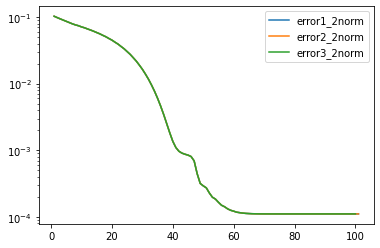

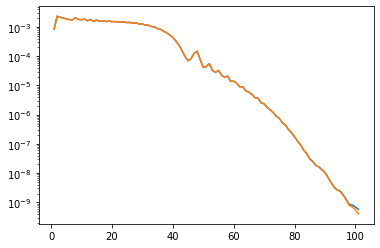

In [42]:
n = 64
A, b, x_exact, x0 = setup.setup_2d_poisson(n)
dtype = np.float32
A = A.astype(dtype)
b = b.astype(dtype)
x0 = x0.astype(dtype)

# preconditioners
jacobi = lambda x: (1/A.diagonal())*x
jacobi = lambda x: x

start = time.process_time()
x1, iterates1, residuals1 = cg.pcg(A, b, x0, x_exact, preconditioner=jacobi, max_iter=100, eps=0, variant='mp_cg')
print(x1.dtype)
print(time.process_time() - start, len(iterates1))
print('residual norm:', np.linalg.norm(A @ x1 - b))

start = time.process_time()
x2, iterates2, residuals2 = cg.pr_pcg(A, b, x0, x_exact, preconditioner=jacobi, max_iter=100, eps=0, recompute=False)
print(x2.dtype)
print(time.process_time() - start, len(iterates2))
print('residual norm:', np.linalg.norm(A @ x2 - b))

start = time.process_time()
#x3, iterates3 = pr_cg.pr_pcg(A, b, x0, max_iter=1200, preconditioner=jacobi)
x3, iterates3, residuals3 = cg.pr_master_pcg(A, b, x0, preconditioner=jacobi, max_iter=100, eps=0)
print(time.process_time() - start, len(iterates3))
print('residual norm:', np.linalg.norm(A @ x3 - b))

error1 = iterates1 - x_exact
error2 = iterates2 - x_exact
error3 = iterates3 - x_exact
print(A.shape, error1.shape)
e1_2norm = np.linalg.norm(error1, axis=1)
e2_2norm = np.linalg.norm(error2, axis=1)
e3_2norm = np.linalg.norm(error3, axis=1)
#e1_2norm = np.apply_along_axis(lambda e: np.linalg.norm(e), 1, error1)
#e2_2norm = np.apply_along_axis(lambda e: np.linalg.norm(e), 1, error2)
e1_Anorm = np.apply_along_axis(lambda e: np.sqrt(e.T @ A @ e), 1, error1)
e2_Anorm = np.apply_along_axis(lambda e: np.sqrt(e.T @ A @ e), 1, error2)
r1_2norm = np.linalg.norm(residuals1, axis=1)
r2_2norm = np.linalg.norm(residuals2, axis=1)
plt.semilogy(np.arange(1,len(e1_2norm)+1), e1_2norm, label='error1_2norm')
plt.semilogy(np.arange(1,len(e2_2norm)+1), e2_2norm, label='error2_2norm')
plt.semilogy(np.arange(1,len(e3_2norm)+1), e3_2norm, label='error3_2norm')
#plt.semilogy(np.arange(1,len(e1_2norm)+1), e1_Anorm, label='error1_Anorm')
#plt.semilogy(np.arange(1,len(e2_2norm)+1), e2_Anorm, label='error2_Anorm')
#plt.semilogy(np.arange(1,len(am1)+1), am1, label='alpha1')
plt.legend()
plt.show()
plt.semilogy(np.arange(1,len(r1_2norm)+1), r1_2norm, label='residual1')
plt.semilogy(np.arange(1,len(r2_2norm)+1), r2_2norm, label='residual2')
plt.show()
#plt.spy(A)
#plt.show()